# «به نام خدا»
## پردازش زبان طبیعی 
## تمرین کامپیوتری شماره 3 - بخش اول
## تعیین نقش کلمات
### امیرحسین دبیری اقدم - 810197502
#####  دانشگاه تهران - اردیبهشت 1401

# **POS Tagging**

# Viterbi

In [1]:
import numpy as np
import nltk
from nltk.corpus import treebank
nltk.download('treebank')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [2]:
freq_dict = dict()
for word, tag in treebank.tagged_words(tagset='universal'):
    if (tag in freq_dict): freq_dict[tag] += 1
    else: freq_dict[tag] = 1
print(freq_dict)

{'NOUN': 28867, '.': 11715, 'NUM': 3546, 'ADJ': 6397, 'VERB': 13564, 'DET': 8725, 'ADP': 9857, 'CONJ': 2265, 'X': 6613, 'ADV': 3171, 'PRT': 3219, 'PRON': 2737}


In [3]:
print(treebank.tagged_sents()[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [4]:
print(treebank.tagged_sents(tagset='universal')[0])

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')]


In [5]:
tagged_sents = list()
for sent in treebank.tagged_sents(tagset='universal'):
    tagged_sents.append(sent)

In [6]:
np.random.seed(810197502)
np.random.shuffle(tagged_sents)

In [7]:
print(len(tagged_sents))

3914


In [8]:
train_sents = tagged_sents[978:] # 75%
valid_sents = tagged_sents[587:978] # 10%
test_sents = tagged_sents[:587] # 15%

In [9]:
X_train = list()
y_train = list()
for sent in train_sents:
    temp_X = list()
    temp_y = list()
    for word in sent:
        temp_X.append(word[0])
        temp_y.append(word[1])
    X_train.append(temp_X)
    y_train.append(temp_y)

X_valid = list()
y_valid = list()
for sent in valid_sents:
    temp_X = list()
    temp_y = list()
    for word in sent:
        temp_X.append(word[0])
        temp_y.append(word[1])
    X_valid.append(temp_X)
    y_valid.append(temp_y)

X_test = list()
y_test = list()
for sent in test_sents:
    temp_X = list()
    temp_y = list()
    for word in sent:
        temp_X.append(word[0])
        temp_y.append(word[1])
    X_test.append(temp_X)
    y_test.append(temp_y)

In [10]:
S = {0:'ADJ', 1:'ADP', 2:'ADV', 3:'CONJ', 4:'DET', 5:'NOUN', 6:'NUM', 7:'PRON', 8:'PRT', 9:'VERB', 10:'X', 11:'.'}

In [11]:
A = list()

#START state
temp = dict()
count = 0
for sent in train_sents:
        count += 1
        if (sent[0][1] in temp): temp[sent[0][1]] += 1
        else: temp[sent[0][1]] = 1
for k, v in temp.items():
    if(count > 0): temp[k] = temp[k] / count
A.append(temp)

for s in S:
    temp = dict()
    count = 0
    for sent in train_sents:
        for i in range(len(sent) - 1):
            word_i = sent[i]
            word_i1 = sent[i + 1]
            if (word_i[1] == S[s]):
                count += 1
                if (word_i1[1] in temp): temp[word_i1[1]] += 1
                else: temp[word_i1[1]] = 1
        # END state
        if (sent[-1][1] == S[s]):
            count += 1
            if ('END' in temp): temp['END'] += 1
            else: temp['END'] = 1
    for k, v in temp.items():
        if (count > 0): temp[k] = temp[k] / count
    A.append(temp)  

In [12]:
A

[{'.': 0.08072207084468665,
  'ADJ': 0.04189373297002725,
  'ADP': 0.1273841961852861,
  'ADV': 0.05074931880108992,
  'CONJ': 0.04904632152588556,
  'DET': 0.23262942779291554,
  'NOUN': 0.3021117166212534,
  'NUM': 0.00715258855585831,
  'PRON': 0.0739100817438692,
  'PRT': 0.0010217983651226157,
  'VERB': 0.008855585831062671,
  'X': 0.02452316076294278},
 {'.': 0.06359466221851542,
  'ADJ': 0.06693077564637198,
  'ADP': 0.08027522935779817,
  'ADV': 0.0045871559633027525,
  'CONJ': 0.015221017514595496,
  'DET': 0.0047956630525437865,
  'NOUN': 0.7016263552960801,
  'NUM': 0.020016680567139282,
  'PRON': 0.0008340283569641367,
  'PRT': 0.010425354462051709,
  'VERB': 0.010633861551292744,
  'X': 0.021059216013344453},
 {'.': 0.037365591397849465,
  'ADJ': 0.1028225806451613,
  'ADP': 0.018145161290322582,
  'ADV': 0.013844086021505376,
  'CONJ': 0.0009408602150537635,
  'DET': 0.3248655913978495,
  'END': 0.0006720430107526882,
  'NOUN': 0.3225806451612903,
  'NUM': 0.0630376344086

In [13]:
# for i in range(len(A)):
#     temp = 0
#     for k, v in A[i].items(): 
#         # if (k == 'END'): print(i)
#         temp += v
#     print(temp)

In [14]:
B = list()
for s in S:
    temp = dict()
    count = 0
    for sent in train_sents:
        for word in sent:
            if (word[1] == S[s]):
                count += 1
                if (word[0] in temp): temp[word[0]] += 1
                else: temp[word[0]] = 1
    for k, v in temp.items():
        if(count > 0): temp[k] = temp[k] / count
    B.append(temp)    

In [15]:
B

[{'Palestinian': 0.0002085070892410342,
  'new': 0.026063386155129275,
  'additional': 0.004170141784820684,
  'promotional': 0.0002085070892410342,
  'expensive': 0.0012510425354462051,
  'executive': 0.0047956630525437865,
  'fiscal': 0.007089241034195163,
  'breathtaking': 0.0002085070892410342,
  'international': 0.0025020850708924102,
  'unsuccessful': 0.0004170141784820684,
  '59-year-old': 0.0002085070892410342,
  'much': 0.0047956630525437865,
  'economic': 0.005838198498748957,
  'last': 0.012301918265221017,
  'presidential': 0.0004170141784820684,
  'off-off': 0.0002085070892410342,
  'few': 0.004170141784820684,
  'same': 0.005838198498748957,
  'Sacramento-based': 0.0002085070892410342,
  'north': 0.0002085070892410342,
  'central': 0.0004170141784820684,
  'little': 0.0022935779816513763,
  'least': 0.0037531276063386154,
  'able': 0.0025020850708924102,
  'common': 0.009382819015846538,
  'outstanding': 0.00396163469557965,
  'separate': 0.0016680567139282735,
  'quick':

In [16]:
def VITERBI(O, S, A, B, not_seen_prob = 1e-6):
    viterbi = np.zeros([len(S) + 2, len(O)])
    backpointer = np.zeros([len(S) + 2, len(O)])
    for s in S:
        viterbi[s][0] = (A[0][S[s]] if (S[s] in A[0]) else not_seen_prob) * (B[s][O[0]] if (O[0] in B[s]) else not_seen_prob)
        backpointer[s][0] = 0
    for t in range(1, len(O)):
        for s in S:
            viterbi[s][t] = np.max([viterbi[i][t-1] * (A[i][S[s]] if (S[s] in A[i]) else not_seen_prob) * (B[s][O[t]] if (O[t] in B[s]) else not_seen_prob) for i in S])
            backpointer[s][t] = np.argmax([viterbi[i][t-1] * (A[i][S[s]] if (S[s] in A[i]) else not_seen_prob) for i in S])
    
    viterbi[len(S) + 1][len(O) - 1] = np.max([viterbi[s][len(O) - 1] * (A[s]['END'] if ('END' in A[s]) else not_seen_prob) for s in S])
    backpointer[len(S) + 1][len(O) - 1] = np.argmax([viterbi[s][len(O) - 1] * (A[s]['END'] if ('END' in A[s]) else not_seen_prob) for s in S])


    best_path = list()
    k = np.argmax([viterbi[s][len(O)-1] for s in S]) 
    for i in range(len(O)-1, -1, -1):  
        best_path.insert(0, (O[i], S[k]))         
        k = int(backpointer[k][i])                
    return best_path

In [17]:
def pre_process(sent):
    temp = list()
    temp2 = list()
    for word in sent:
            temp.append(word[0])
            temp2.append(word[1])
    return temp, temp2

In [18]:
def compute_accuracy(test_sents):
    correct = 0
    total = 0
    not_seen_prob = 1 / len(treebank.tagged_words(tagset='universal'))
    for sent in test_sents:
        sent, true_tags = pre_process(sent)
        pred_tags = VITERBI(sent, S, A, B, not_seen_prob)
        for i in range(len(true_tags)):
            total += 1
            if(true_tags[i] == pred_tags[i][1]):
                correct += 1
        
    return correct/total * 100

In [19]:
compute_accuracy(test_sents)

85.70547099958866

In [34]:
compute_accuracy(train_sents) # to compare with RNNs as reference

89.58415425434103

In [33]:
compute_accuracy(valid_sents) # to compare with RNNs as reference

85.39574126155082

In [20]:
not_seen_prob = 1 / len(treebank.tagged_words(tagset='universal'))
test, _ = pre_process(test_sents[550])
print('Prediction POS tags:')
print(VITERBI(test, S, A, B, not_seen_prob))
print('Actual POS tags:')
for word in test_sents[550]:
   print(word, end=', ')

Prediction POS tags:
[('A', 'DET'), ('player', '.'), ("'s", 'PRT'), ('commitment', '.'), ('to', 'PRT'), ('practice', 'NOUN'), ('and', 'NOUN'), ('team', 'NOUN'), ('image', 'NOUN'), ('is', 'VERB'), ('as', 'ADP'), ('important', 'ADJ'), ('as', 'ADV'), ('his', 'PRON'), ('batting', 'NOUN'), ('average', 'ADJ'), ('.', '.')]
Actual POS tags:
('A', 'DET'), ('player', 'NOUN'), ("'s", 'PRT'), ('commitment', 'NOUN'), ('to', 'PRT'), ('practice', 'NOUN'), ('and', 'CONJ'), ('team', 'NOUN'), ('image', 'NOUN'), ('is', 'VERB'), ('as', 'ADV'), ('important', 'ADJ'), ('as', 'ADP'), ('his', 'PRON'), ('batting', 'NOUN'), ('average', 'NOUN'), ('.', '.'), 

In [21]:
not_seen_prob = 1 / len(treebank.tagged_words(tagset='universal'))
test, _ = pre_process(test_sents[14])
print('Prediction POS tags:')
print(VITERBI(test, S, A, B, not_seen_prob))
print('Actual POS tags:')
for word in test_sents[14]:
   print(word, end=', ')

Prediction POS tags:
[('Ten', 'NOUN'), ('shirt-sleeved', 'NOUN'), ('ringers', 'NOUN'), ('stand', 'VERB'), ('in', 'ADP'), ('a', 'DET'), ('circle', 'ADJ'), (',', '.'), ('one', 'PRON'), ('foot', 'X'), ('ahead', 'ADV'), ('of', 'ADP'), ('the', 'DET'), ('other', 'ADJ'), ('in', 'ADP'), ('a', 'DET'), ('prize-fighter', '.'), ("'s", 'PRT'), ('stance', 'VERB'), (',', '.'), ('each', 'DET'), ('pulling', 'ADJ'), ('a', 'DET'), ('rope', 'ADJ'), ('that', 'ADP'), ('*T*-225', 'NOUN'), ('disappears', 'ADJ'), ('through', 'ADP'), ('a', 'DET'), ('small', 'ADJ'), ('hole', '.'), ('in', 'ADP'), ('the', 'DET'), ('high', 'ADJ'), ('ceiling', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('ringing', 'VERB'), ('chamber', 'VERB'), ('.', '.')]
Actual POS tags:
('Ten', 'NUM'), ('shirt-sleeved', 'ADJ'), ('ringers', 'NOUN'), ('stand', 'VERB'), ('in', 'ADP'), ('a', 'DET'), ('circle', 'NOUN'), (',', '.'), ('one', 'NUM'), ('foot', 'NOUN'), ('ahead', 'ADV'), ('of', 'ADP'), ('the', 'DET'), ('other', 'ADJ'), ('in', 'ADP'), ('a', 'DE

In [22]:
test, _ = pre_process(test_sents[25])
print('Prediction POS tags:')
print(VITERBI(test, S, A, B, not_seen_prob))
print('Actual POS tags:')
for word in test_sents[25]:
    if (word[1] != '.'): print(word, end=', ')

Prediction POS tags:
[('The', 'DET'), ('rise', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('stock', 'NOUN'), ("'s", 'VERB'), ('price', 'NOUN'), ('may', 'VERB'), ('also', 'ADV'), ('reflect', 'DET'), ('the', 'DET'), ('fact', 'NOUN'), ('that', 'ADP'), ('USX', 'NOUN'), ("'s", 'VERB'), ('steel', 'NOUN'), ('segment', 'NOUN'), ('fared', 'NOUN'), ('better', 'ADJ'), ('than', 'ADP'), ('some', 'DET'), ('other', 'ADJ'), ('steelmakers', '.'), ("'", 'PRT'), ('.', '.')]
Actual POS tags:
('The', 'DET'), ('rise', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('stock', 'NOUN'), ("'s", 'PRT'), ('price', 'NOUN'), ('may', 'VERB'), ('also', 'ADV'), ('reflect', 'VERB'), ('the', 'DET'), ('fact', 'NOUN'), ('that', 'ADP'), ('USX', 'NOUN'), ("'s", 'PRT'), ('steel', 'NOUN'), ('segment', 'NOUN'), ('fared', 'VERB'), ('better', 'ADV'), ('than', 'ADP'), ('some', 'DET'), ('other', 'ADJ'), ('steelmakers', 'NOUN'), ("'", 'PRT'), 

In [23]:
test, _ = pre_process(test_sents[313])
print('Prediction POS tags:')
print(VITERBI(test, S, A, B, not_seen_prob))
print('Actual POS tags:')
for word in test_sents[313]:
    if (word[1] != '.'): print(word, end=', ')

Prediction POS tags:
[('``', '.'), ('*', 'X'), ('Being', 'X'), ('a', 'DET'), ('teacher', 'NOUN'), ('just', 'ADV'), ('became', 'VERB'), ('my', 'PRON'), ('life', 'NOUN'), (',', '.'), ("''", '.'), ('says', 'VERB'), ('*T*-1', 'X'), ('the', 'DET'), ('37-year-old', 'NOUN'), ('Mrs.', 'NOUN'), ('Yeargin', 'NOUN'), (',', '.'), ('a', 'DET'), ('teacher', 'NOUN'), ('for', 'ADP'), ('12', 'NUM'), ('years', 'NOUN'), ('before', 'ADV'), ('her', 'PRON'), ('dismissal', 'NUM'), ('.', '.'), ('``', '.')]
Actual POS tags:
('*', 'X'), ('Being', 'VERB'), ('a', 'DET'), ('teacher', 'NOUN'), ('just', 'ADV'), ('became', 'VERB'), ('my', 'PRON'), ('life', 'NOUN'), ('says', 'VERB'), ('*T*-1', 'X'), ('the', 'DET'), ('37-year-old', 'ADJ'), ('Mrs.', 'NOUN'), ('Yeargin', 'NOUN'), ('a', 'DET'), ('teacher', 'NOUN'), ('for', 'ADP'), ('12', 'NUM'), ('years', 'NOUN'), ('before', 'ADP'), ('her', 'PRON'), ('dismissal', 'NOUN'), 

# RNNs

In [24]:
from torchtext.vocab import GloVe, vocab
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import shutil
import time
import os
import matplotlib.pyplot as plt

torch.manual_seed(810197502)

In [25]:
def prepare_sentence(sent, embedding):
    idxs = [embedding.stoi[w[0]] if (w[0] in embedding.stoi) else 0 for w in sent]
    return torch.tensor(idxs, dtype=torch.long)

def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w[1]] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)

In [26]:
unk_token = "<unk>"
unk_index = 0
EMBEDDING_DIM = 300
glove_vectors = GloVe(name='6B', dim=EMBEDDING_DIM)
glove_vocab = vocab(glove_vectors.stoi)
glove_vocab.insert_token(unk_token, unk_index)
glove_vocab.set_default_index(unk_index)
weights = glove_vectors.vectors
weights = torch.cat((torch.zeros(1, weights.shape[1]), weights))
weights = torch.FloatTensor(weights)

tag_to_ix = {"ADJ": 0, "ADP": 1, "ADV": 2, 'CONJ':3, "DET":4, 'NOUN':5, 'NUM':6, 'PRON':7, 'PRT':8, 'VERB':9, 'X':10, '.':11} 

.vector_cache/glove.6B.zip: 862MB [02:41, 5.35MB/s]                           
100%|█████████▉| 399999/400000 [00:46<00:00, 8641.86it/s]


In [27]:
# run one epoch of training
def train(model, train_sents, loss_function, optimizer, use_gpu=False):
    model.train()  # Set model to training mode
    running_loss = 0.0
    running_corrects = 0
    example_count = 0
    step = 0
    for sentence in train_sents:
        model.zero_grad()

        sentence_in = prepare_sentence(sentence, glove_vectors)
        targets = prepare_sequence(sentence, tag_to_ix)
        if (use_gpu): 
            sentence_in = sentence_in.cuda() 
            targets = targets.cuda()

        tag_scores = model(sentence_in)
        _, preds = torch.max(tag_scores, 1)

        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.data
        running_corrects += torch.sum((preds == targets).data)

    example_count += np.sum([len(sent) for sent in train_sents])

    loss = running_loss / example_count
    acc = (running_corrects / example_count) * 100

    print('Train Loss: {:.4f} Acc: {:2.3f} ({}/{})'.format(loss, acc, running_corrects, example_count))
    return loss, acc


def validate(model, valid_sents, loss_function, use_gpu=False):
    model.eval()  # Set model to evaluate mode
    running_loss = 0.0
    running_corrects = 0
    example_count = 0
    for sentence in valid_sents:
        sentence_in = prepare_sentence(sentence, glove_vectors)
        targets = prepare_sequence(sentence, tag_to_ix)
        if (use_gpu): 
            sentence_in = sentence_in.cuda() 
            targets = targets.cuda()
        tag_scores = model(sentence_in)
        _, preds = torch.max(tag_scores, 1)

        loss = loss_function(tag_scores, targets)

        running_loss += loss.data
        running_corrects += torch.sum((preds == targets).data)
         
    example_count += np.sum([len(sent) for sent in valid_sents])
    loss = running_loss / example_count
    acc = (running_corrects / example_count) * 100
    print('Validation Loss: {:.4f} Acc: {:2.3f} ({}/{})'.format(loss, acc, running_corrects, example_count))
    return loss, acc


def train_model(model, train_sents, valid_sents, loss_function, optimizer, save_dir, num_epochs=25, use_gpu=False):
    print('Training Model with use_gpu={}...'.format(use_gpu))
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    val_losses = list()
    train_losses = list()
    val_accs = list()
    train_accs = list()
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        train_begin = time.time()
        train_loss, train_acc = train(model, train_sents, loss_function, optimizer, use_gpu)
        train_losses.append(train_loss.cpu())
        train_accs.append(train_acc.cpu())
        train_time = time.time() - train_begin
        print('Epoch Train Time: {:.0f}m {:.0f}s'.format(train_time // 60, train_time % 60))

        validation_begin = time.time()
        val_loss, val_acc = validate(model, valid_sents, loss_function, use_gpu)
        val_losses.append(val_loss.cpu())
        val_accs.append(val_acc.cpu())
        validation_time = time.time() - validation_begin
        print('Epoch Validation Time: {:.0f}m {:.0f}s'.format(validation_time // 60, validation_time % 60))

        is_best = val_acc > best_acc
        if is_best:
            best_acc = val_acc
            best_model_wts = model.state_dict()

        save_checkpoint(save_dir, {
            'epoch': epoch,
            'best_acc': best_acc,
            'state_dict': model.state_dict(),
        }, is_best)


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    model.load_state_dict(best_model_wts)

    return model, train_losses, train_accs, val_losses, val_accs


def save_checkpoint(save_dir, state, is_best):
    savepath = save_dir + '/' + 'checkpoint.pth.tar'
    torch.save(state, savepath)
    if is_best:
        shutil.copyfile(savepath, save_dir + '/' + 'model_best.pth.tar')


def test_model(model, test_sents, use_gpu=False):
    model.eval()  # Set model to evaluate mode
    running_corrects = 0
    example_count = 0
    test_begin = time.time()
    for sentence in test_sents:
        sentence_in = prepare_sentence(sentence, glove_vectors)
        targets = prepare_sequence(sentence, tag_to_ix)
        if (use_gpu): 
            sentence_in = sentence_in.cuda() 
            targets = targets.cuda()
        tag_scores = model(sentence_in)
        _, preds = torch.max(tag_scores, 1)

        running_corrects += torch.sum((preds == targets).data)
    
    example_count += np.sum([len(sent) for sent in test_sents])
    acc = (running_corrects / example_count) * 100
    print('Test Acc: {:2.3f} ({}/{})'.format(acc, running_corrects, example_count))
    test_time = time.time() - test_begin
    print('Test Time: {:.0f}m {:.0f}s'.format(test_time // 60, test_time % 60))
    return acc

# Vanilla RNN

In [ ]:
class RNNTagger(nn.Module):

    def __init__(self, word_embeddings_weights, embedding_dim, hidden_dim, tagset_size, use_gpu=False, freeze=False):
        super(RNNTagger, self).__init__()
        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding.from_pretrained(word_embeddings_weights, freeze=freeze)
        if use_gpu:
            self.word_embeddings.cuda()
        self.RNN = nn.RNN(embedding_dim, hidden_dim)
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        RNN_out, _ = self.RNN(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(RNN_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [ ]:
HIDDEN_DIM = 32
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
lr = 0.1
epochs = 20
save_dir = 'RNN_32'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
model = RNNTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    model = model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
print("begin training")
model, train_losses, train_accs, val_losses, val_accs = train_model(model, train_sents, valid_sents, loss_function, optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'RNN_32/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/19
----------
Train Loss: 0.0345 Acc: 70.928 (54000/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0256 Acc: 78.063 (7772/9956)
Epoch Validation Time: 0m 1s
Epoch 1/19
----------
Train Loss: 0.0227 Acc: 80.255 (61101/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0215 Acc: 81.217 (8086/9956)
Epoch Validation Time: 0m 0s
Epoch 2/19
----------
Train Loss: 0.0192 Acc: 83.073 (63247/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0194 Acc: 83.146 (8278/9956)
Epoch Validation Time: 0m 0s
Epoch 3/19
----------
Train Loss: 0.0169 Acc: 84.916 (64650/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0182 Acc: 84.010 (8364/9956)
Epoch Validation Time: 0m 0s
Epoch 4/19
----------
Train Loss: 0.0153 Acc: 86.323 (65721/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0176 Acc: 84.803 (8443/9956)
Epoch Validation Time: 0m 0s
Epoch 5/19
----------
Train Loss: 0.0141 Acc: 87.3

In [ ]:
reload = save_dir + "/model_best.pth.tar"
model = RNNTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    model = model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading best model '{}'".format(reload))
        checkpoint = torch.load(reload)
        model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded best model '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no  model found at '{}'".format(reload))
test_model(model, test_sents, use_gpu=use_gpu)

=> loading best model 'RNN_32/model_best.pth.tar'
=> loaded best model 'RNN_32/model_best.pth.tar' (epoch 10, accuracy 85.92808532714844)
Test Acc: 85.376 (12453/14586)
Test Time: 0m 0s


tensor(85.3764, device='cuda:0')

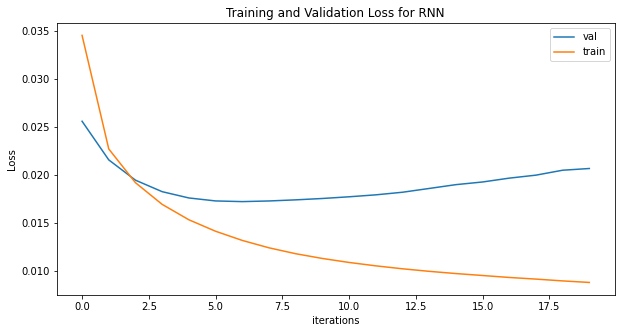

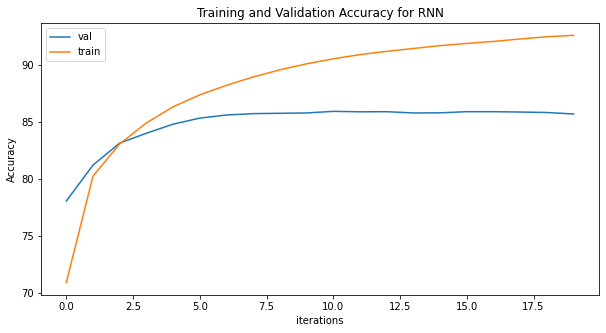

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for RNN")
plt.plot(val_losses, label="val")
plt.plot(train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for RNN")
plt.plot(val_accs,label="val")
plt.plot(train_accs,label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
HIDDEN_DIM = 16
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
lr = 0.1
epochs = 20
save_dir = 'RNN_16'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
model = RNNTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    model = model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
print("begin training")
model, train_losses, train_accs, val_losses, val_accs = train_model(model, train_sents, valid_sents, loss_function, optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'RNN_16/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/19
----------
Train Loss: 0.0365 Acc: 69.351 (52800/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0270 Acc: 77.320 (7698/9956)
Epoch Validation Time: 0m 0s
Epoch 1/19
----------
Train Loss: 0.0242 Acc: 79.323 (60392/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0229 Acc: 80.494 (8014/9956)
Epoch Validation Time: 0m 0s
Epoch 2/19
----------
Train Loss: 0.0206 Acc: 82.091 (62499/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0208 Acc: 82.202 (8184/9956)
Epoch Validation Time: 0m 0s
Epoch 3/19
----------
Train Loss: 0.0183 Acc: 83.982 (63939/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0195 Acc: 83.337 (8297/9956)
Epoch Validation Time: 0m 0s
Epoch 4/19
----------
Train Loss: 0.0167 Acc: 85.355 (64984/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0187 Acc: 84.090 (8372/9956)
Epoch Validation Time: 0m 0s
Epoch 5/19
----------
Train Loss: 0.0154 Acc: 86.4

In [ ]:
reload = save_dir + "/model_best.pth.tar"
model = RNNTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    model = model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading best model '{}'".format(reload))
        checkpoint = torch.load(reload)
        model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded best model '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no  model found at '{}'".format(reload))
test_model(model, test_sents, use_gpu=use_gpu)

=> loading best model 'RNN_16/model_best.pth.tar'
=> loaded best model 'RNN_16/model_best.pth.tar' (epoch 4, accuracy 86.08879089355469)
Test Acc: 85.664 (12495/14586)
Test Time: 0m 0s


tensor(85.6643, device='cuda:0')

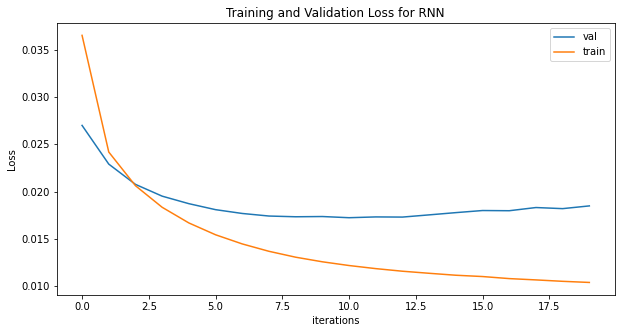

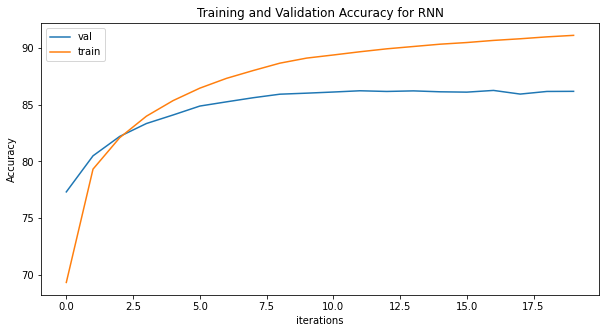

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for RNN")
plt.plot(val_losses, label="val")
plt.plot(train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for RNN")
plt.plot(val_accs,label="val")
plt.plot(train_accs,label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
HIDDEN_DIM = 64
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
lr = 0.1
epochs = 20
save_dir = 'RNN_64'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
model = RNNTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    model = model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
print("begin training")
model, train_losses, train_accs, val_losses, val_accs = train_model(model, train_sents, valid_sents, loss_function, optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'RNN_64/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/19
----------
Train Loss: 0.0337 Acc: 71.462 (54407/76134)
Epoch Train Time: 0m 53s
Validation Loss: 0.0255 Acc: 78.043 (7770/9956)
Epoch Validation Time: 0m 0s
Epoch 1/19
----------
Train Loss: 0.0228 Acc: 80.148 (61020/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0215 Acc: 81.549 (8119/9956)
Epoch Validation Time: 0m 0s
Epoch 2/19
----------
Train Loss: 0.0191 Acc: 83.147 (63303/76134)
Epoch Train Time: 0m 53s
Validation Loss: 0.0196 Acc: 83.136 (8277/9956)
Epoch Validation Time: 0m 0s
Epoch 3/19
----------
Train Loss: 0.0167 Acc: 85.088 (64781/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0186 Acc: 83.929 (8356/9956)
Epoch Validation Time: 0m 0s
Epoch 4/19
----------
Train Loss: 0.0149 Acc: 86.597 (65930/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0182 Acc: 84.532 (8416/9956)
Epoch Validation Time: 0m 0s
Epoch 5/19
----------
Train Loss: 0.0136 Acc: 87.9

In [ ]:
reload = save_dir + "/model_best.pth.tar"
model = RNNTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    model = model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading best model '{}'".format(reload))
        checkpoint = torch.load(reload)
        model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded best model '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no  model found at '{}'".format(reload))
test_model(model, test_sents, use_gpu=use_gpu)

=> loading best model 'RNN_64/model_best.pth.tar'
=> loaded best model 'RNN_64/model_best.pth.tar' (epoch 17, accuracy 85.97830200195312)
Test Acc: 85.274 (12438/14586)
Test Time: 0m 0s


tensor(85.2735, device='cuda:0')

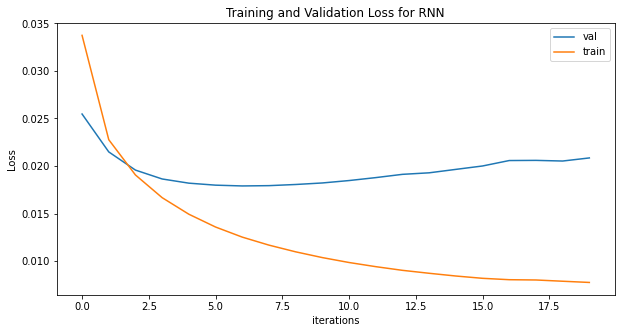

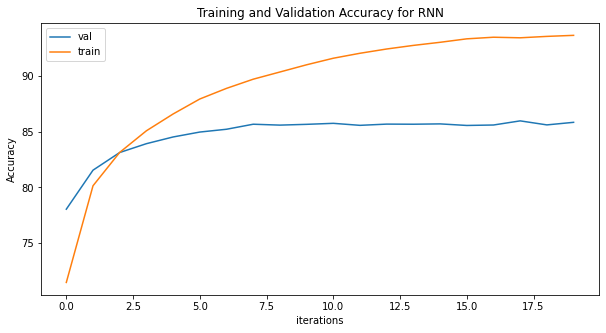

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for RNN")
plt.plot(val_losses, label="val")
plt.plot(train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for RNN")
plt.plot(val_accs,label="val")
plt.plot(train_accs,label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
HIDDEN_DIM = 32
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
lr = 0.01
epochs = 200
save_dir = 'RNN'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
model = RNNTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu, True)
if use_gpu:
    model = model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
print("begin training")
model, train_losses, train_accs, val_losses, val_accs = train_model(model, train_sents, valid_sents, loss_function, optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

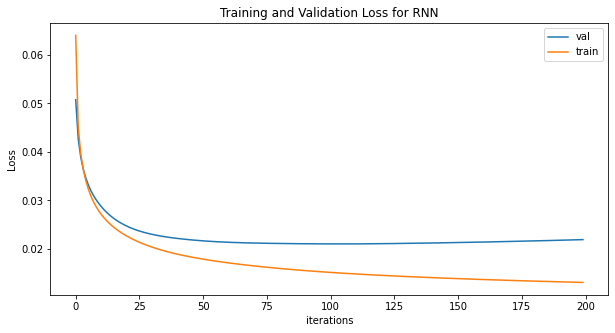

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for RNN")
plt.plot(val_losses, label="val")
plt.plot(train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

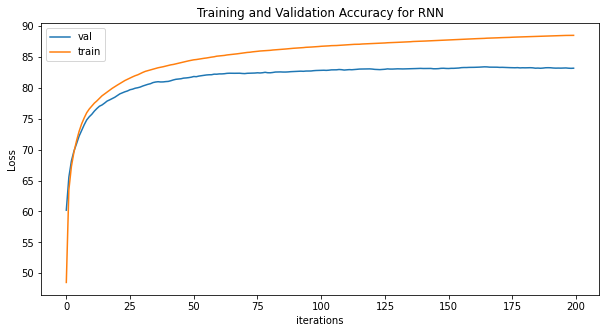

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for RNN")
plt.plot(val_accs,label="val")
plt.plot(train_accs,label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
HIDDEN_DIM = 64
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
lr = 0.01
epochs = 200
save_dir = 'RNN_64'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
model = RNNTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu, True)
if use_gpu:
    model = model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
print("begin training")
model, train_losses, train_accs, val_losses, val_accs = train_model(model, train_sents, valid_sents, loss_function, optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'RNN_64/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/199
----------
Train Loss: 0.0608 Acc: 51.605 (39289/76134)
Epoch Train Time: 0m 9s
Validation Loss: 0.0473 Acc: 62.666 (6239/9956)
Epoch Validation Time: 0m 0s
Epoch 1/199
----------
Train Loss: 0.0420 Acc: 65.865 (50146/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0400 Acc: 67.206 (6691/9956)
Epoch Validation Time: 0m 0s
Epoch 2/199
----------
Train Loss: 0.0370 Acc: 69.657 (53033/76134)
Epoch Train Time: 0m 9s
Validation Loss: 0.0366 Acc: 69.737 (6943/9956)
Epoch Validation Time: 0m 0s
Epoch 3/199
----------
Train Loss: 0.0341 Acc: 71.620 (54527/76134)
Epoch Train Time: 0m 9s
Validation Loss: 0.0344 Acc: 71.374 (7106/9956)
Epoch Validation Time: 0m 0s
Epoch 4/199
----------
Train Loss: 0.0321 Acc: 73.057 (55621/76134)
Epoch Train Time: 0m 9s
Validation Loss: 0.0328 Acc: 72.348 (7203/9956)
Epoch Validation Time: 0m 0s
Epoch 5/199
----------
Train Loss: 0.0305 Acc: 74

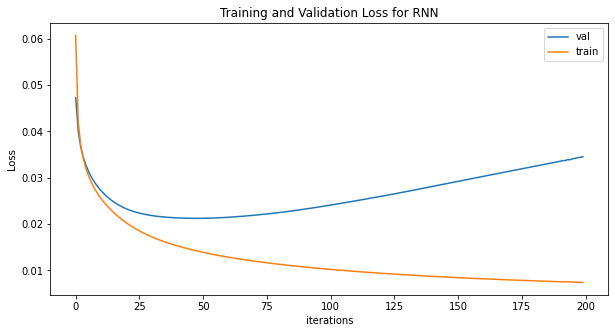

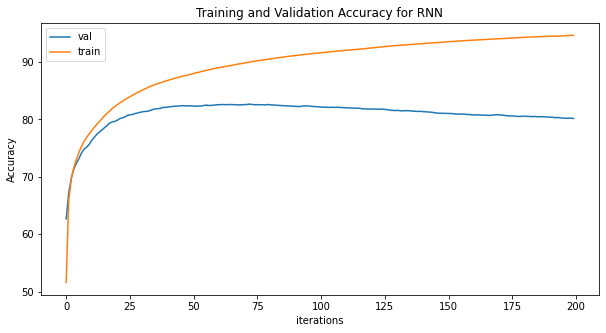

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for RNN")
plt.plot(val_losses, label="val")
plt.plot(train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for RNN")
plt.plot(val_accs,label="val")
plt.plot(train_accs,label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# LSTM

In [ ]:
class LSTMTagger(nn.Module):

    def __init__(self, word_embeddings_weights, embedding_dim, hidden_dim, tagset_size, use_gpu=False, freeze=False):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding.from_pretrained(word_embeddings_weights, freeze=freeze)
        if use_gpu:
            self.word_embeddings.cuda()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [ ]:
HIDDEN_DIM = 16
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
LSTM_lr = 0.1
epochs = 25
save_dir = 'LSTM_16'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
LSTM_model = LSTMTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    LSTM_model = LSTM_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        LSTM_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

LSTM_loss_function = nn.NLLLoss()
LSTM_optimizer = optim.SGD(LSTM_model.parameters(), lr=LSTM_lr)
print("begin training")
LSTM_model, LSTM_train_losses, LSTM_train_accs, LSTM_val_losses, LSTM_val_accs = train_model(LSTM_model, train_sents, valid_sents, LSTM_loss_function, LSTM_optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'LSTM_16/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/24
----------
Train Loss: 0.0448 Acc: 63.481 (48331/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0292 Acc: 75.121 (7479/9956)
Epoch Validation Time: 0m 0s
Epoch 1/24
----------
Train Loss: 0.0254 Acc: 78.510 (59773/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0232 Acc: 80.575 (8022/9956)
Epoch Validation Time: 0m 0s
Epoch 2/24
----------
Train Loss: 0.0209 Acc: 82.114 (62517/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0206 Acc: 82.674 (8231/9956)
Epoch Validation Time: 0m 0s
Epoch 3/24
----------
Train Loss: 0.0183 Acc: 84.054 (63994/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0193 Acc: 83.598 (8323/9956)
Epoch Validation Time: 0m 0s
Epoch 4/24
----------
Train Loss: 0.0166 Acc: 85.462 (65066/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0185 Acc: 84.361 (8399/9956)
Epoch Validation Time: 0m 0s
Epoch 5/24
----------
Train Loss: 0.0153 Acc: 86.

In [ ]:
reload = save_dir + "/model_best.pth.tar"
LSTM_model = LSTMTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    LSTM_model = LSTM_model.cuda()
if reload:
    if os.path.isfile(reload):
        print("=> loading best model '{}'".format(reload))
        checkpoint = torch.load(reload)
        LSTM_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded best model '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no  model found at '{}'".format(reload))
test_model(LSTM_model, test_sents, use_gpu=use_gpu)

=> loading best model 'LSTM_16/model_best.pth.tar'
=> loaded best model 'LSTM_16/model_best.pth.tar' (epoch 22, accuracy 86.15910339355469)
Test Acc: 85.431 (12461/14586)
Test Time: 0m 1s


tensor(85.4312, device='cuda:0')

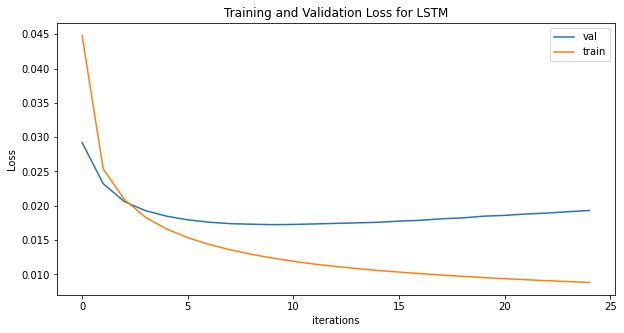

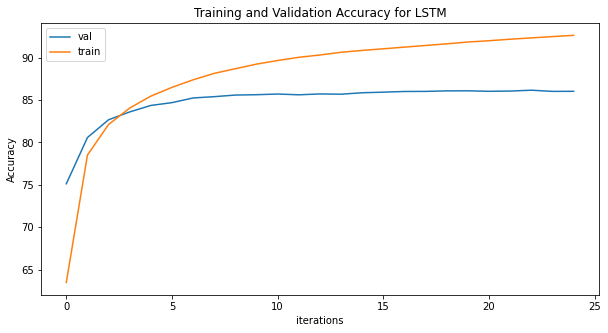

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for LSTM")
plt.plot(LSTM_val_losses, label="val")
plt.plot(LSTM_train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for LSTM")
plt.plot(LSTM_val_accs, label="val")
plt.plot(LSTM_train_accs, label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
HIDDEN_DIM = 32
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
LSTM_lr = 0.1
epochs = 20
save_dir = 'LSTM_32'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
LSTM_model = LSTMTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    LSTM_model = LSTM_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        LSTM_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

LSTM_loss_function = nn.NLLLoss()
LSTM_optimizer = optim.SGD(LSTM_model.parameters(), lr=LSTM_lr)
print("begin training")
LSTM_model, LSTM_train_losses, LSTM_train_accs, LSTM_val_losses, LSTM_val_accs = train_model(LSTM_model, train_sents, valid_sents, LSTM_loss_function, LSTM_optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'LSTM_32/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/19
----------
Train Loss: 0.0426 Acc: 65.269 (49692/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0270 Acc: 76.908 (7657/9956)
Epoch Validation Time: 0m 0s
Epoch 1/19
----------
Train Loss: 0.0235 Acc: 79.782 (60741/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0216 Acc: 81.057 (8070/9956)
Epoch Validation Time: 0m 0s
Epoch 2/19
----------
Train Loss: 0.0193 Acc: 83.128 (63289/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0192 Acc: 82.985 (8262/9956)
Epoch Validation Time: 0m 0s
Epoch 3/19
----------
Train Loss: 0.0169 Acc: 85.137 (64818/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0179 Acc: 83.879 (8351/9956)
Epoch Validation Time: 0m 0s
Epoch 4/19
----------
Train Loss: 0.0152 Acc: 86.599 (65931/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0171 Acc: 84.622 (8425/9956)
Epoch Validation Time: 0m 0s
Epoch 5/19
----------
Train Loss: 0.0139 Acc: 87.

In [ ]:
reload = save_dir + "/model_best.pth.tar"
LSTM_model = LSTMTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    LSTM_model = LSTM_model.cuda()
if reload:
    if os.path.isfile(reload):
        print("=> loading best model '{}'".format(reload))
        checkpoint = torch.load(reload)
        LSTM_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded best model '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no  model found at '{}'".format(reload))
test_model(LSTM_model, test_sents, use_gpu=use_gpu)

=> loading best model 'LSTM_32/model_best.pth.tar'
=> loaded best model 'LSTM_32/model_best.pth.tar' (epoch 14, accuracy 86.55082702636719)
Test Acc: 85.987 (12542/14586)
Test Time: 0m 0s


tensor(85.9866, device='cuda:0')

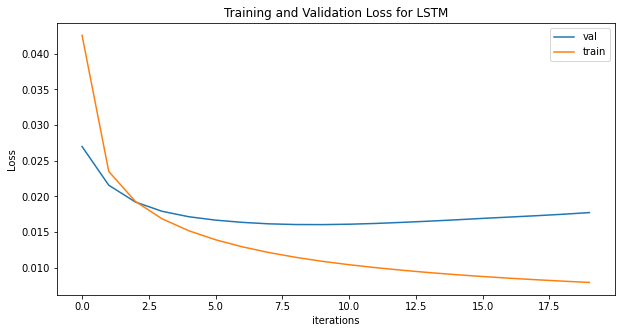

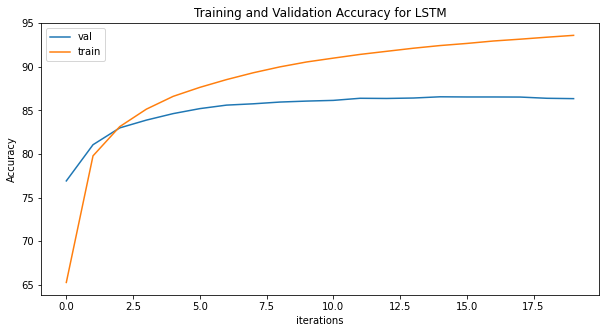

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for LSTM")
plt.plot(LSTM_val_losses, label="val")
plt.plot(LSTM_train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for LSTM")
plt.plot(LSTM_val_accs, label="val")
plt.plot(LSTM_train_accs, label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
HIDDEN_DIM = 64
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
LSTM_lr = 0.1
epochs = 20
save_dir = 'LSTM_64'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
LSTM_model = LSTMTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    LSTM_model = LSTM_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        LSTM_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

LSTM_loss_function = nn.NLLLoss()
LSTM_optimizer = optim.SGD(LSTM_model.parameters(), lr=LSTM_lr)
print("begin training")
LSTM_model, LSTM_train_losses, LSTM_train_accs, LSTM_val_losses, LSTM_val_accs = train_model(LSTM_model, train_sents, valid_sents, LSTM_loss_function, LSTM_optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'LSTM_64/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/19
----------
Train Loss: 0.0417 Acc: 65.876 (50154/76134)
Epoch Train Time: 0m 53s
Validation Loss: 0.0264 Acc: 77.260 (7692/9956)
Epoch Validation Time: 0m 0s
Epoch 1/19
----------
Train Loss: 0.0232 Acc: 79.914 (60842/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0213 Acc: 81.217 (8086/9956)
Epoch Validation Time: 0m 0s
Epoch 2/19
----------
Train Loss: 0.0190 Acc: 83.243 (63376/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0190 Acc: 83.256 (8289/9956)
Epoch Validation Time: 0m 0s
Epoch 3/19
----------
Train Loss: 0.0166 Acc: 85.321 (64958/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0176 Acc: 84.472 (8410/9956)
Epoch Validation Time: 0m 0s
Epoch 4/19
----------
Train Loss: 0.0148 Acc: 86.822 (66101/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0168 Acc: 85.215 (8484/9956)
Epoch Validation Time: 0m 0s
Epoch 5/19
----------
Train Loss: 0.0135 Acc: 87.

In [ ]:
reload = save_dir + "/model_best.pth.tar"
LSTM_model = LSTMTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    LSTM_model = LSTM_model.cuda()
if reload:
    if os.path.isfile(reload):
        print("=> loading best model '{}'".format(reload))
        checkpoint = torch.load(reload)
        LSTM_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded best model '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no  model found at '{}'".format(reload))
test_model(LSTM_model, test_sents, use_gpu=use_gpu)

=> loading best model 'LSTM_64/model_best.pth.tar'
=> loaded best model 'LSTM_64/model_best.pth.tar' (epoch 12, accuracy 86.63117980957031)
Test Acc: 85.952 (12537/14586)
Test Time: 0m 0s


tensor(85.9523, device='cuda:0')

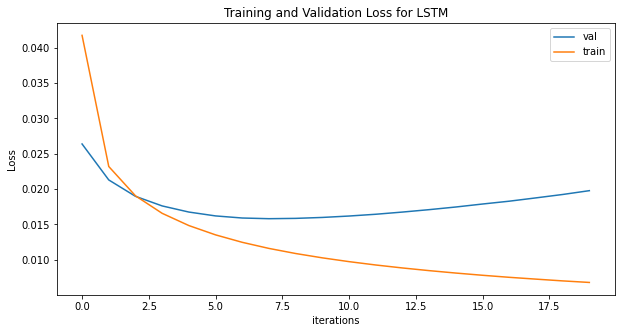

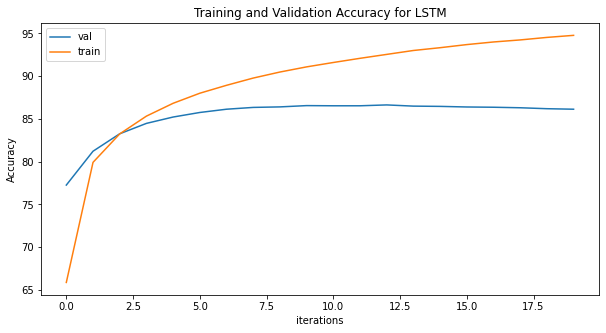

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for LSTM")
plt.plot(LSTM_val_losses, label="val")
plt.plot(LSTM_train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for LSTM")
plt.plot(LSTM_val_accs, label="val")
plt.plot(LSTM_train_accs, label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
HIDDEN_DIM = 64
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
lr = 0.01
epochs = 200
save_dir = 'RNN_64'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
LSTM_model = LSTMTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu, True)
if use_gpu:
    LSTM_model = LSTM_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        LSTM_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
print("begin training")
model, train_losses, train_accs, val_losses, val_accs = train_model(model, train_sents, valid_sents, loss_function, optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

In [ ]:
HIDDEN_DIM = 32
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
LSTM_lr = 0.01
epochs = 200
save_dir = 'LSTM'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
LSTM_model = LSTMTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu, True)
if use_gpu:
    LSTM_model = LSTM_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        LSTM_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

LSTM_loss_function = nn.NLLLoss()
LSTM_optimizer = optim.SGD(LSTM_model.parameters(), lr=LSTM_lr)
print("begin training")
LSTM_model, LSTM_train_losses, LSTM_train_accs, LSTM_val_losses, LSTM_val_accs = train_model(LSTM_model, train_sents, valid_sents, LSTM_loss_function, LSTM_optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'LSTM/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/199
----------
Train Loss: 0.0821 Acc: 31.233 (23779/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0752 Acc: 40.599 (4042/9956)
Epoch Validation Time: 0m 1s
Epoch 1/199
----------
Train Loss: 0.0651 Acc: 49.624 (37781/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0572 Acc: 57.111 (5686/9956)
Epoch Validation Time: 0m 1s
Epoch 2/199
----------
Train Loss: 0.0512 Acc: 60.002 (45682/76134)
Epoch Train Time: 0m 11s
Validation Loss: 0.0478 Acc: 61.561 (6129/9956)
Epoch Validation Time: 0m 1s
Epoch 3/199
----------
Train Loss: 0.0445 Acc: 63.696 (48494/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0430 Acc: 64.665 (6438/9956)
Epoch Validation Time: 0m 1s
Epoch 4/199
----------
Train Loss: 0.0405 Acc: 66.710 (50789/76134)
Epoch Train Time: 0m 14s
Validation Loss: 0.0399 Acc: 66.945 (6665/9956)
Epoch Validation Time: 0m 1s
Epoch 5/199
----------
Train Loss: 0.0377 Acc: 

In [ ]:
test_model(LSTM_model, test_sents, use_gpu=use_gpu)

Test Acc: 84.211 (12283/14586)
Test Time: 0m 1s


tensor(84.2109, device='cuda:0')

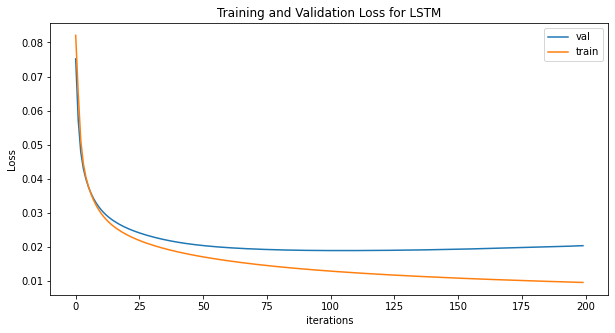

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for LSTM")
plt.plot(LSTM_val_losses, label="val")
plt.plot(LSTM_train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

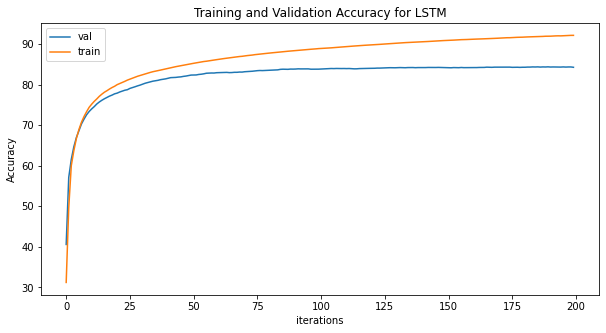

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for LSTM")
plt.plot(LSTM_val_accs, label="val")
plt.plot(LSTM_train_accs, label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# test = prepare_sentence(test_sents[5], glove_vectors)
# if (use_gpu):
#     test = test.cuda()
# print('Predicted POS tags:')
# _, preds = torch.max(model(test), 1)
# for i in range(len(preds)):
#     print("('%s', '%s')" %(test_sents[5][i][0], S[int(preds[i])]), end=', ')

# print('\nActual POS tags:')
# for word in test_sents[5]:
#     print(word, end=', ')

In [ ]:
HIDDEN_DIM = 64
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
LSTM_lr = 0.01
epochs = 100
save_dir = 'LSTM_64'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
LSTM_model = LSTMTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu, True)
if use_gpu:
    LSTM_model = LSTM_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        LSTM_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

LSTM_loss_function = nn.NLLLoss()
LSTM_optimizer = optim.SGD(LSTM_model.parameters(), lr=LSTM_lr)
print("begin training")
LSTM_model, LSTM_train_losses, LSTM_train_accs, LSTM_val_losses, LSTM_val_accs = train_model(LSTM_model, train_sents, valid_sents, LSTM_loss_function, LSTM_optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'LSTM_64/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/99
----------
Train Loss: 0.0818 Acc: 32.100 (24439/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0755 Acc: 40.458 (4028/9956)
Epoch Validation Time: 0m 1s
Epoch 1/99
----------
Train Loss: 0.0654 Acc: 49.027 (37326/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0570 Acc: 57.754 (5750/9956)
Epoch Validation Time: 0m 1s
Epoch 2/99
----------
Train Loss: 0.0504 Acc: 61.151 (46557/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0465 Acc: 62.605 (6233/9956)
Epoch Validation Time: 0m 1s
Epoch 3/99
----------
Train Loss: 0.0432 Acc: 64.748 (49295/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0417 Acc: 65.850 (6556/9956)
Epoch Validation Time: 0m 1s
Epoch 4/99
----------
Train Loss: 0.0393 Acc: 68.035 (51798/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0387 Acc: 68.210 (6791/9956)
Epoch Validation Time: 0m 1s
Epoch 5/99
----------
Train Loss: 0.0366 Acc: 70.

In [ ]:
test_model(LSTM_model, test_sents, use_gpu=use_gpu)

Test Acc: 82.819 (12080/14586)
Test Time: 0m 1s


tensor(82.8191, device='cuda:0')

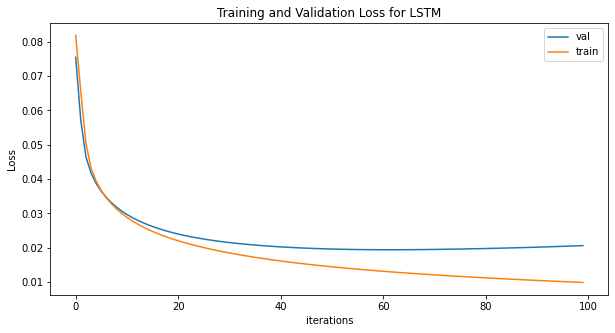

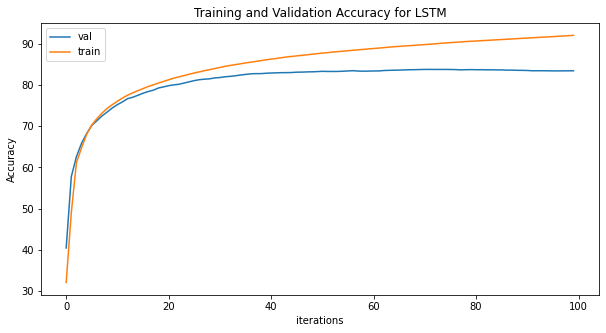

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for LSTM")
plt.plot(LSTM_val_losses, label="val")
plt.plot(LSTM_train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for LSTM")
plt.plot(LSTM_val_accs, label="val")
plt.plot(LSTM_train_accs, label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# GRU

In [29]:
class GRUTagger(nn.Module):

    def __init__(self, word_embeddings_weights, embedding_dim, hidden_dim, tagset_size, use_gpu=False, freeze=False):
        super(GRUTagger, self).__init__()
        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding.from_pretrained(word_embeddings_weights, freeze=freeze)
        if use_gpu:
            self.word_embeddings.cuda()
        self.gru = nn.GRU(embedding_dim, hidden_dim)

        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        gru_out, _ = self.gru(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(gru_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [ ]:
HIDDEN_DIM = 16
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
GRU_lr = 0.1
epochs = 25
save_dir = 'GRU_16'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
GRU_model = GRUTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    GRU_model = GRU_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        GRU_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

GRU_loss_function = nn.NLLLoss()
GRU_optimizer = optim.SGD(GRU_model.parameters(), lr=GRU_lr)
print("begin training")
GRU_model, GRU_train_losses, GRU_train_accs, GRU_val_losses, GRU_val_accs = train_model(GRU_model, train_sents, valid_sents, GRU_loss_function, GRU_optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'GRU_16/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/24
----------
Train Loss: 0.0387 Acc: 68.301 (52000/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0267 Acc: 77.370 (7703/9956)
Epoch Validation Time: 0m 0s
Epoch 1/24
----------
Train Loss: 0.0237 Acc: 79.997 (60905/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0221 Acc: 81.117 (8076/9956)
Epoch Validation Time: 0m 0s
Epoch 2/24
----------
Train Loss: 0.0198 Acc: 82.874 (63095/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0199 Acc: 83.116 (8275/9956)
Epoch Validation Time: 0m 0s
Epoch 3/24
----------
Train Loss: 0.0174 Acc: 84.740 (64516/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0187 Acc: 84.160 (8379/9956)
Epoch Validation Time: 0m 0s
Epoch 4/24
----------
Train Loss: 0.0157 Acc: 86.089 (65543/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0179 Acc: 84.763 (8439/9956)
Epoch Validation Time: 0m 0s
Epoch 5/24
----------
Train Loss: 0.0144 Acc: 87.1

In [ ]:
reload = save_dir + "/model_best.pth.tar"
GRU_model = GRUTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu, True)
if use_gpu:
    GRU_model = GRU_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading best model '{}'".format(reload))
        checkpoint = torch.load(reload)
        GRU_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded best model '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no  model found at '{}'".format(reload))
test_model(GRU_model, test_sents, use_gpu=use_gpu)

=> loading best model 'GRU_16/model_best.pth.tar'
=> loaded best model 'GRU_16/model_best.pth.tar' (epoch 14, accuracy 86.6010513305664)
Test Acc: 85.856 (12523/14586)
Test Time: 0m 0s


tensor(85.8563, device='cuda:0')

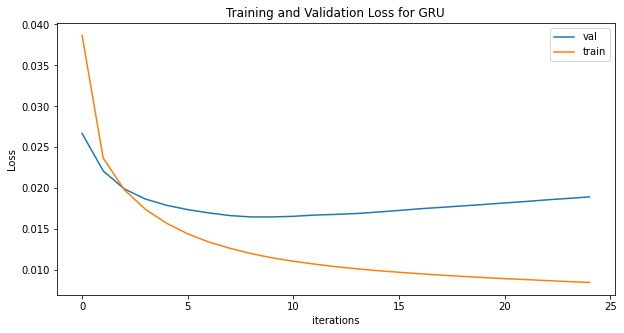

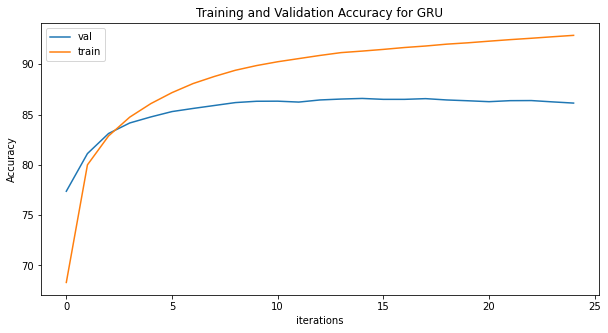

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for GRU")
plt.plot(GRU_val_losses, label="val")
plt.plot(GRU_train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for GRU")
plt.plot(GRU_val_accs, label="val")
plt.plot(GRU_train_accs, label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
HIDDEN_DIM = 32
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
GRU_lr = 0.1
epochs = 20
save_dir = 'GRU_32'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
GRU_model = GRUTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    GRU_model = GRU_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        GRU_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

GRU_loss_function = nn.NLLLoss()
GRU_optimizer = optim.SGD(GRU_model.parameters(), lr=GRU_lr)
print("begin training")
GRU_model, GRU_train_losses, GRU_train_accs, GRU_val_losses, GRU_val_accs = train_model(GRU_model, train_sents, valid_sents, GRU_loss_function, GRU_optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'GRU_32/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/19
----------
Train Loss: 0.0374 Acc: 68.863 (52428/76134)
Epoch Train Time: 0m 52s
Validation Loss: 0.0254 Acc: 78.023 (7768/9956)
Epoch Validation Time: 0m 0s
Epoch 1/19
----------
Train Loss: 0.0225 Acc: 80.616 (61376/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0210 Acc: 81.659 (8130/9956)
Epoch Validation Time: 0m 0s
Epoch 2/19
----------
Train Loss: 0.0186 Acc: 83.733 (63749/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0190 Acc: 83.176 (8281/9956)
Epoch Validation Time: 0m 0s
Epoch 3/19
----------
Train Loss: 0.0162 Acc: 85.640 (65201/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0177 Acc: 84.311 (8394/9956)
Epoch Validation Time: 0m 0s
Epoch 4/19
----------
Train Loss: 0.0144 Acc: 87.125 (66332/76134)
Epoch Train Time: 0m 51s
Validation Loss: 0.0170 Acc: 85.356 (8498/9956)
Epoch Validation Time: 0m 0s
Epoch 5/19
----------
Train Loss: 0.0132 Acc: 88.3

In [ ]:
reload = save_dir + "/model_best.pth.tar"
GRU_model = GRUTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu, True)
if use_gpu:
    GRU_model = GRU_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading best model '{}'".format(reload))
        checkpoint = torch.load(reload)
        GRU_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded best model '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no  model found at '{}'".format(reload))
test_model(GRU_model, test_sents, use_gpu=use_gpu)

=> loading best model 'GRU_32/model_best.pth.tar'
=> loaded best model 'GRU_32/model_best.pth.tar' (epoch 18, accuracy 86.74166107177734)
Test Acc: 86.048 (12551/14586)
Test Time: 0m 0s


tensor(86.0483, device='cuda:0')

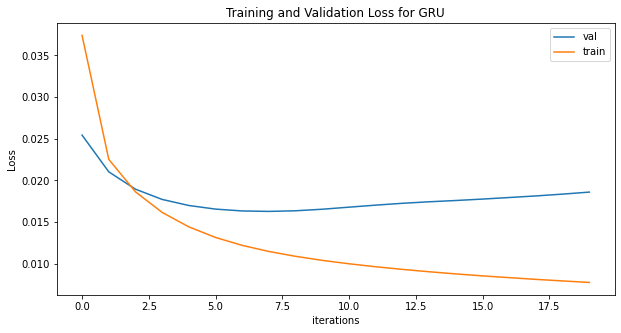

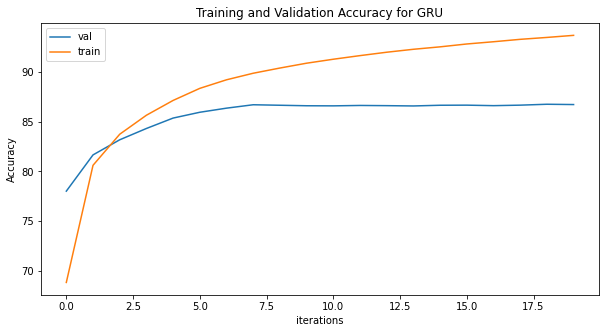

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for GRU")
plt.plot(GRU_val_losses, label="val")
plt.plot(GRU_train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for GRU")
plt.plot(GRU_val_accs, label="val")
plt.plot(GRU_train_accs, label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [30]:
HIDDEN_DIM = 64
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
GRU_lr = 0.1
epochs = 20
save_dir = 'GRU_64'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
GRU_model = GRUTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu)
if use_gpu:
    GRU_model = GRU_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        GRU_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

GRU_loss_function = nn.NLLLoss()
GRU_optimizer = optim.SGD(GRU_model.parameters(), lr=GRU_lr)
print("begin training")
GRU_model, GRU_train_losses, GRU_train_accs, GRU_val_losses, GRU_val_accs = train_model(GRU_model, train_sents, valid_sents, GRU_loss_function, GRU_optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'GRU_64/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/19
----------
Train Loss: 0.0364 Acc: 69.803 (53144/76134)
Epoch Train Time: 1m 20s
Validation Loss: 0.0251 Acc: 78.144 (7780/9956)
Epoch Validation Time: 0m 1s
Epoch 1/19
----------
Train Loss: 0.0221 Acc: 80.881 (61578/76134)
Epoch Train Time: 1m 18s
Validation Loss: 0.0205 Acc: 81.890 (8153/9956)
Epoch Validation Time: 0m 1s
Epoch 2/19
----------
Train Loss: 0.0181 Acc: 84.117 (64042/76134)
Epoch Train Time: 1m 18s
Validation Loss: 0.0183 Acc: 83.929 (8356/9956)
Epoch Validation Time: 0m 1s
Epoch 3/19
----------
Train Loss: 0.0156 Acc: 86.147 (65587/76134)
Epoch Train Time: 1m 18s
Validation Loss: 0.0171 Acc: 85.165 (8479/9956)
Epoch Validation Time: 0m 1s
Epoch 4/19
----------
Train Loss: 0.0139 Acc: 87.684 (66757/76134)
Epoch Train Time: 1m 18s
Validation Loss: 0.0164 Acc: 85.868 (8549/9956)
Epoch Validation Time: 0m 1s
Epoch 5/19
----------
Train Loss: 0.0126 Acc: 88.8

In [31]:
reload = save_dir + "/model_best.pth.tar"
GRU_model = GRUTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu, True)
if use_gpu:
    GRU_model = GRU_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading best model '{}'".format(reload))
        checkpoint = torch.load(reload)
        GRU_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded best model '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no  model found at '{}'".format(reload))
test_model(GRU_model, test_sents, use_gpu=use_gpu)

=> loading best model 'GRU_64/model_best.pth.tar'
=> loaded best model 'GRU_64/model_best.pth.tar' (epoch 15, accuracy 87.08316802978516)
Test Acc: 86.021 (12547/14586)
Test Time: 0m 1s


tensor(86.0208, device='cuda:0')

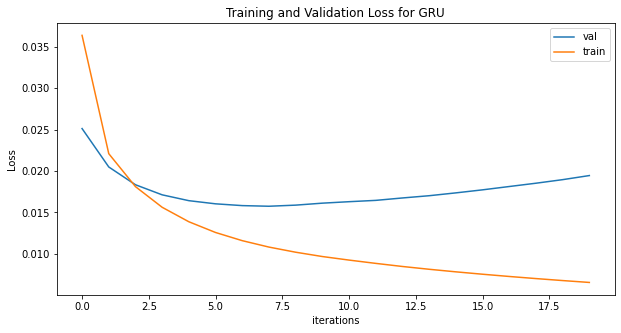

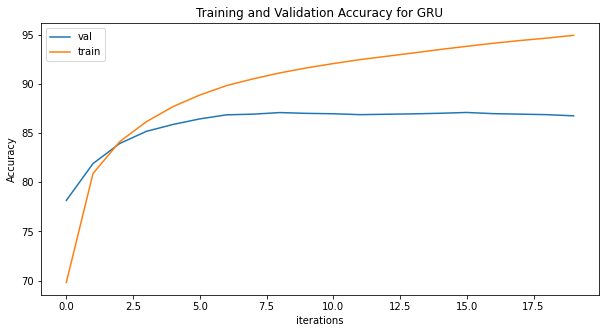

In [32]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for GRU")
plt.plot(GRU_val_losses, label="val")
plt.plot(GRU_train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for GRU")
plt.plot(GRU_val_accs, label="val")
plt.plot(GRU_train_accs, label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
HIDDEN_DIM = 32
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
GRU_lr = 0.01
epochs = 100
save_dir = 'GRU'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
GRU_model = GRUTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu, True)
if use_gpu:
    GRU_model = GRU_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        GRU_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

GRU_loss_function = nn.NLLLoss()
GRU_optimizer = optim.SGD(GRU_model.parameters(), lr=GRU_lr)
print("begin training")
GRU_model, GRU_train_losses, GRU_train_accs, GRU_val_losses, GRU_val_accs = train_model(GRU_model, train_sents, valid_sents, GRU_loss_function, GRU_optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'GRU/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/99
----------
Train Loss: 0.0738 Acc: 42.048 (32013/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0594 Acc: 55.223 (5498/9956)
Epoch Validation Time: 0m 0s
Epoch 1/99
----------
Train Loss: 0.0510 Acc: 60.132 (45781/76134)
Epoch Train Time: 0m 9s
Validation Loss: 0.0466 Acc: 62.224 (6195/9956)
Epoch Validation Time: 0m 0s
Epoch 2/99
----------
Train Loss: 0.0432 Acc: 64.870 (49388/76134)
Epoch Train Time: 0m 9s
Validation Loss: 0.0418 Acc: 66.241 (6595/9956)
Epoch Validation Time: 0m 0s
Epoch 3/99
----------
Train Loss: 0.0393 Acc: 68.194 (51919/76134)
Epoch Train Time: 0m 9s
Validation Loss: 0.0387 Acc: 68.933 (6863/9956)
Epoch Validation Time: 0m 0s
Epoch 4/99
----------
Train Loss: 0.0365 Acc: 70.489 (53666/76134)
Epoch Train Time: 0m 9s
Validation Loss: 0.0363 Acc: 70.741 (7043/9956)
Epoch Validation Time: 0m 0s
Epoch 5/99
----------
Train Loss: 0.0343 Acc: 72.290 (550

In [36]:
test_model(GRU_model, test_sents, use_gpu=use_gpu)

Test Acc: 84.087 (12265/14586)
Test Time: 0m 1s


tensor(84.0875, device='cuda:0')

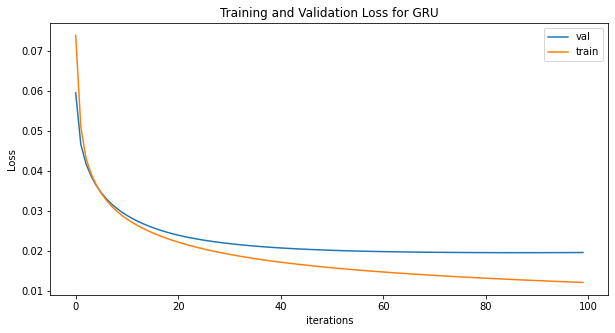

In [37]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for GRU")
plt.plot(GRU_val_losses, label="val")
plt.plot(GRU_train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

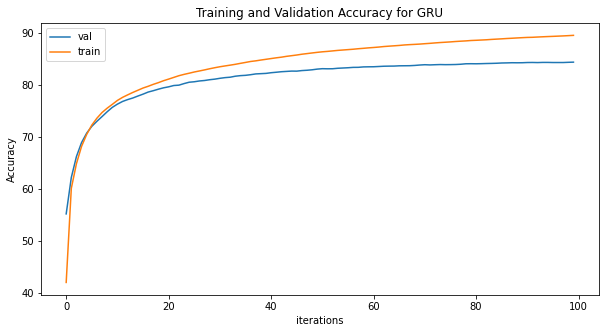

In [38]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for GRU")
plt.plot(GRU_val_accs, label="val")
plt.plot(GRU_train_accs, label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
HIDDEN_DIM = 64
use_gpu = True
use_gpu = use_gpu and torch.cuda.is_available()
GRU_lr = 0.01
epochs = 100
save_dir = 'GRU_64'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
reload = save_dir + "/checkpoint.pth.tar"
GRU_model = GRUTagger(weights, EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix), use_gpu, True)
if use_gpu:
    GRU_model = GRU_model.cuda()

if reload:
    if os.path.isfile(reload):
        print("=> loading checkpoint '{}'".format(reload))
        checkpoint = torch.load(reload)
        GRU_model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {}, accuracy {})" .format(reload, checkpoint['epoch'], checkpoint['best_acc']))
    else:
        print("=> no checkpoint found at '{}'".format(reload))

GRU_loss_function = nn.NLLLoss()
GRU_optimizer = optim.SGD(GRU_model.parameters(), lr=GRU_lr)
print("begin training")
GRU_model, GRU_train_losses, GRU_train_accs, GRU_val_losses, GRU_val_accs = train_model(GRU_model, train_sents, valid_sents, GRU_loss_function, GRU_optimizer, save_dir, num_epochs=epochs, use_gpu=use_gpu)

=> no checkpoint found at 'GRU_64/checkpoint.pth.tar'
begin training
Training Model with use_gpu=True...
Epoch 0/99
----------
Train Loss: 0.0728 Acc: 42.719 (32524/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0578 Acc: 57.754 (5750/9956)
Epoch Validation Time: 0m 1s
Epoch 1/99
----------
Train Loss: 0.0494 Acc: 61.054 (46483/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0452 Acc: 63.208 (6293/9956)
Epoch Validation Time: 0m 1s
Epoch 2/99
----------
Train Loss: 0.0417 Acc: 65.898 (50171/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0404 Acc: 67.206 (6691/9956)
Epoch Validation Time: 0m 1s
Epoch 3/99
----------
Train Loss: 0.0377 Acc: 69.257 (52728/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0373 Acc: 69.827 (6952/9956)
Epoch Validation Time: 0m 1s
Epoch 4/99
----------
Train Loss: 0.0350 Acc: 71.586 (54501/76134)
Epoch Train Time: 0m 10s
Validation Loss: 0.0350 Acc: 71.575 (7126/9956)
Epoch Validation Time: 0m 1s
Epoch 5/99
----------
Train Loss: 0.0328 Acc: 72.9

In [43]:
test_model(GRU_model, test_sents, use_gpu=use_gpu)

Test Acc: 83.909 (12239/14586)
Test Time: 0m 1s


tensor(83.9092, device='cuda:0')

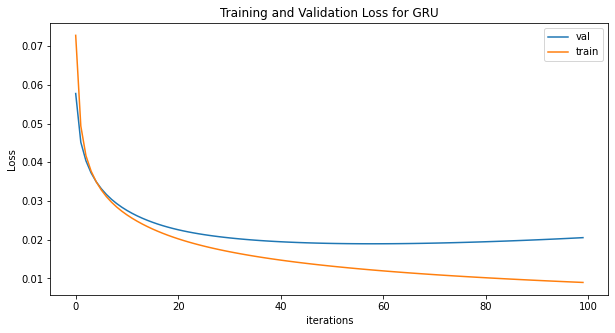

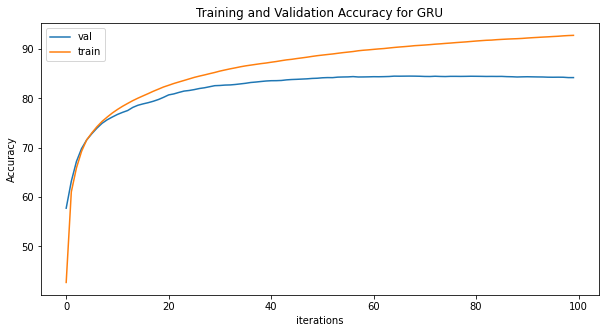

In [44]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss for GRU")
plt.plot(GRU_val_losses, label="val")
plt.plot(GRU_train_losses, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy for GRU")
plt.plot(GRU_val_accs, label="val")
plt.plot(GRU_train_accs, label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()